In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

In [2]:
# converting it in numerical data - # Countvectorizer, TFIDF

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix

from sklearn.metrics import precision_score, recall_score,plot_roc_curve, roc_auc_score

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Algorithms

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier,BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier

from sklearn.ensemble import VotingClassifier

import xgboost as xgb

import lightgbm as lgb


from sklearn.svm import SVC

from sklearn.neighbors import KNeighborsClassifier

from sklearn.naive_bayes import GaussianNB, MultinomialNB,BernoulliNB

In [6]:
from sklearn.model_selection import train_test_split, KFold,cross_val_score

from sklearn.preprocessing import LabelEncoder

from imblearn.over_sampling import SMOTE

In [7]:
sentiment = pd.read_csv('Sentiment_data.csv')

sentiment

,title,rating,body,clean_review,af_sentiment,tb_polarity,Bi_Sentiment,Mul_Sentiment
0,Unreliable earphones with high cost,1.0,"This earphones are unreliable, i bought it be...",earphone unreliable bought day meanwhile right...,10.0,0.377,Positive,Positive
1,Honest review of an edm music lover,3.0,No doubt it has a great bass and to a great ex...,doubt great bass great extent noise cancellati...,0.0,0.061,Positive,Neutral
2,Really good and durable.,4.0,"i bought itfor 999,I purchased it second time,...",bought itfor purchased second time gifted firs...,22.0,0.536,Positive,Positive
3,"A good earphone but with some issues, read thi...",4.0,I'll get straight to the pros and cons of Boat...,get straight pro con boat rockerz pro bluetoot...,34.0,0.134,Positive,Neutral
4,Charging port not working,1.0,"After 11 days, the charging port isn't working...",day charging port working even return wat know...,1.0,0.136,Positive,Neutral
...,...,...,...,...,...,...,...,...
4995,Bad -Don't Buy -Cheating on warranty -Product ...,1.0,Product is malfunctioning after 3 months and a...,product malfunctioning month sending back warr...,0.0,0.000,Positive,Neutral
4996,Awesome!!,5.0,very nice and smoothly working with good quali...,nice smoothly working good quality sound thankyou,8.0,0.525,Positive,Positive
4997,"A quality peice of bluetooth earphones, batter...",4.0,"I am really contented with the headphones, rea...",really contented headphone really good sound q...,-2.0,-0.053,Negative,Negative
4998,An outstanding pair of wireless earphones - at...,5.0,This product's sound quality is impressive. Th...,product sound quality impressive tagline speak...,8.0,0.328,Positive,Positive


In [8]:
sentiment_binary = sentiment[['clean_review','Bi_Sentiment']]

sentiment_binary.head(3)

,clean_review,Bi_Sentiment
0,earphone unreliable bought day meanwhile right...,Positive
1,doubt great bass great extent noise cancellati...,Positive
2,bought itfor purchased second time gifted firs...,Positive


In [9]:
label = LabelEncoder()

sentiment_binary['Labels'] = label.fit_transform(sentiment_binary['Bi_Sentiment'])

sentiment_binary.head(3)

,clean_review,Bi_Sentiment,Labels
0,earphone unreliable bought day meanwhile right...,Positive,1
1,doubt great bass great extent noise cancellati...,Positive,1
2,bought itfor purchased second time gifted firs...,Positive,1


In [10]:
sentiment_binary['clean_review'] = sentiment_binary['clean_review'].apply(lambda x:str(x))

### TFIDF

In [11]:
tfidf = TfidfVectorizer()

array = tfidf.fit_transform(sentiment_binary['clean_review'].values).toarray()

In [12]:
X = pd.DataFrame(data = array, columns= tfidf.get_feature_names())
X

,aa,aab,aac,aagya,aaj,aaja,aam,aana,aane,aap,...,zip,zipped,zmi,zone,zook,zoom,zoomautomatically,zorin,zthe,zyada
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
y = sentiment_binary['Labels']

### Checking the Classification Value Counts - Data is Balanced or Not ?

1    4151
0     849
Name: Labels, dtype: int64


<AxesSubplot:ylabel='Labels'>

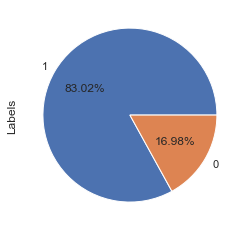

In [14]:
print(y.value_counts())

y.value_counts().plot.pie(autopct = '%0.2f%%')

In [ ]:
# Data Is Im Balanced Data

### Model Building Without Balancing the Data

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, shuffle=True, random_state=7,stratify=y)

1    3321
0     679
Name: Labels, dtype: int64


<AxesSubplot:ylabel='Labels'>

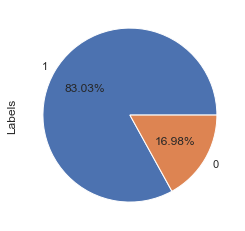

In [16]:
print(y_train.value_counts())

y_train.value_counts().plot.pie(autopct = '%0.2f%%')

1    830
0    170
Name: Labels, dtype: int64


<AxesSubplot:ylabel='Labels'>

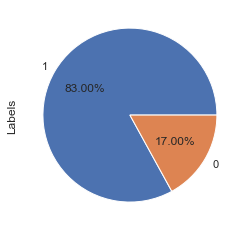

In [17]:
print(y_test.value_counts())

y_test.value_counts().plot.pie(autopct = '%0.2f%%')

## Model Building & Evaluation

### Logistic Regression

In [18]:
%%time
lg = LogisticRegression(class_weight= {0:5,1:1})

model_lg = lg.fit(X_train,y_train)


Wall time: 1.4 s


In [19]:
# predictions on Train Data

y_pred_train_lg = model_lg.predict(X_train)

# metrics

lg_train_accuracy         = np.round(accuracy_score(y_train,y_pred_train_lg),4)

lg_train_precision        = np.round(precision_score(y_train,y_pred_train_lg),4)

lg_train_recall           = np.round(recall_score(y_train,y_pred_train_lg),4)

lg_train_auc              = np.round(roc_auc_score(y_train,y_pred_train_lg),4)

lg_train_confusion_matrix = confusion_matrix(y_train,y_pred_train_lg)

print(f'Accuracy Score on Training Data is    : {lg_train_accuracy}')

print(f'Precision Score on Training Data is   : {lg_train_precision}')

print(f'Recall Score on Training Data is      : {lg_train_recall}')

print(f'AUC Score on Training Data is         : {lg_train_auc}')

print(f'Confusion Matrix on Training Data     :\n {lg_train_confusion_matrix}')

Accuracy Score on Training Data is    : 0.9498
Precision Score on Training Data is   : 0.999
Recall Score on Training Data is      : 0.9404
AUC Score on Training Data is         : 0.968
Confusion Matrix on Training Data     :
 [[ 676    3]
 [ 198 3123]]


In [20]:
# predictions on Test Data

y_pred_test_lg = model_lg.predict(X_test)

# metrics

lg_test_accuracy         = np.round(accuracy_score(y_test,y_pred_test_lg),4)

lg_test_precision        = np.round(precision_score(y_test,y_pred_test_lg),4)

lg_test_recall           = np.round(recall_score(y_test,y_pred_test_lg),4)

lg_test_auc              = np.round(roc_auc_score(y_test,y_pred_test_lg),4)

lg_test_confusion_matrix = confusion_matrix(y_test,y_pred_test_lg)

print(f'Accuracy Score on Testing Data is    : {lg_test_accuracy}')

print(f'Precision Score on Testing Data is   : {lg_test_precision}')

print(f'Recall Score on Testing Data is      : {lg_test_recall}')

print(f'Recall Score on Testing Data is      : {lg_test_auc}')

print(f'Confusion Matrix on Testing Data     :\n {lg_test_confusion_matrix}')

Accuracy Score on Testing Data is    : 0.904
Precision Score on Testing Data is   : 0.9717
Recall Score on Testing Data is      : 0.9108
Recall Score on Testing Data is      : 0.8907
Confusion Matrix on Testing Data     :
 [[148  22]
 [ 74 756]]


### Naive Bayes

In [21]:
%%time
nb = MultinomialNB()

model_nb = nb.fit(X_train,y_train)

Wall time: 167 ms


In [22]:
# predictions on Train Data

y_pred_train_nb = model_nb.predict(X_train)

# metrics

nb_train_accuracy         = np.round(accuracy_score(y_train,y_pred_train_nb),4)

nb_train_precision        = np.round(precision_score(y_train,y_pred_train_nb),4)

nb_train_recall           = np.round(recall_score(y_train,y_pred_train_nb),4)

nb_train_auc              = np.round(roc_auc_score(y_train,y_pred_train_nb),4)

nb_train_confusion_matrix = confusion_matrix(y_train,y_pred_train_nb)

print(f'Accuracy Score on Training Data is    : {nb_train_accuracy}')

print(f'Precision Score on Training Data is   : {nb_train_precision}')

print(f'Recall Score on Training Data is      : {nb_train_recall}')

print(f'AUC Score on Training Data is         : {nb_train_auc}')

print(f'Confusion Matrix on Training Data     :\n {nb_train_confusion_matrix}')

Accuracy Score on Training Data is    : 0.832
Precision Score on Training Data is   : 0.8319
Recall Score on Training Data is      : 0.9997
AUC Score on Training Data is         : 0.5057
Confusion Matrix on Training Data     :
 [[   8  671]
 [   1 3320]]


In [23]:
# predictions on Test Data

y_pred_test_nb = model_nb.predict(X_test)

# metrics

nb_test_accuracy         = np.round(accuracy_score(y_test,y_pred_test_nb),4)

nb_test_precision        = np.round(precision_score(y_test,y_pred_test_nb),4)

nb_test_recall           = np.round(recall_score(y_test,y_pred_test_nb),4)

nb_test_auc              = np.round(roc_auc_score(y_test,y_pred_test_nb),4)

nb_test_confusion_matrix = confusion_matrix(y_test,y_pred_test_nb)

print(f'Accuracy Score on Testing Data is    : {nb_test_accuracy}')

print(f'Precision Score on Testing Data is   : {nb_test_precision}')

print(f'Recall Score on Testing Data is      : {nb_test_recall}')

print(f'AUC Score on Testing Data is         : {nb_test_auc}')

print(f'Confusion Matrix on Testing Data     :\n {nb_test_confusion_matrix}')

Accuracy Score on Testing Data is    : 0.829
Precision Score on Testing Data is   : 0.8298
Recall Score on Testing Data is      : 0.9988
AUC Score on Testing Data is         : 0.4994
Confusion Matrix on Testing Data     :
 [[  0 170]
 [  1 829]]


### Support Vector Machine

In [24]:
%%time 

svm = SVC(kernel='linear')

model_svm = svm.fit(X_train,y_train)

Wall time: 55.8 s


In [25]:
# predictions on Train Data

y_pred_train_svm = model_svm.predict(X_train)

# metrics

svm_train_accuracy         = np.round(accuracy_score(y_train,y_pred_train_svm),4)

svm_train_precision        = np.round(precision_score(y_train,y_pred_train_svm),4)

svm_train_recall           = np.round(recall_score(y_train,y_pred_train_svm),4)

svm_train_auc              = np.round(roc_auc_score(y_train,y_pred_train_svm),4)

svm_train_confusion_matrix = confusion_matrix(y_train,y_pred_train_svm)

print(f'Accuracy Score on Training Data is    : {svm_train_accuracy}')

print(f'Precision Score on Training Data is   : {svm_train_precision}')

print(f'Recall Score on Training Data is      : {svm_train_recall}')

print(f'AUC Score on Training Data is         : {svm_train_auc}')

print(f'Confusion Matrix on Training Data     :\n {svm_train_confusion_matrix}')

Accuracy Score on Training Data is    : 0.9775
Precision Score on Training Data is   : 0.9761
Recall Score on Training Data is      : 0.9973
AUC Score on Training Data is         : 0.939
Confusion Matrix on Training Data     :
 [[ 598   81]
 [   9 3312]]


In [26]:
# predictions on Test Data

y_pred_test_svm = model_svm.predict(X_test)

# metrics

svm_test_accuracy         = np.round(accuracy_score(y_test,y_pred_test_svm),4)

svm_test_precision        = np.round(precision_score(y_test,y_pred_test_svm),4)

svm_test_recall           = np.round(recall_score(y_test,y_pred_test_svm),4)

svm_test_auc              = np.round(roc_auc_score(y_test,y_pred_test_svm),4)

svm_test_confusion_matrix = confusion_matrix(y_test,y_pred_test_svm)

print(f'Accuracy Score on Testing Data is    : {svm_test_accuracy}')

print(f'Precision Score on Testing Data is   : {svm_test_precision}')

print(f'Recall Score on Testing Data is      : {svm_test_recall}')

print(f'AUC Score on Testing Data is         : {svm_test_auc}')

print(f'Confusion Matrix on Testing Data     :\n {svm_test_confusion_matrix}')

Accuracy Score on Testing Data is    : 0.906
Precision Score on Testing Data is   : 0.9135
Recall Score on Testing Data is      : 0.9795
AUC Score on Testing Data is         : 0.7633
Confusion Matrix on Testing Data     :
 [[ 93  77]
 [ 17 813]]


### Decision Tree

In [27]:
%%time
d_tree = DecisionTreeClassifier(criterion= 'gini', min_samples_split= 5, random_state=7, class_weight={0:5,1:1})

model_dt = d_tree.fit(X_train,y_train)

Wall time: 23.6 s


In [28]:
# predictions on Train Data

y_pred_train_dt = model_dt.predict(X_train)

# metrics

dt_train_accuracy         = np.round(accuracy_score(y_train,y_pred_train_dt),4)

dt_train_precision        = np.round(precision_score(y_train,y_pred_train_dt),4)

dt_train_recall           = np.round(recall_score(y_train,y_pred_train_dt),4)

dt_train_auc              = np.round(roc_auc_score(y_train,y_pred_train_dt),4)

dt_train_confusion_matrix = confusion_matrix(y_train,y_pred_train_dt)

print(f'Accuracy Score on Training Data is    : {dt_train_accuracy}')

print(f'Precision Score on Training Data is   : {dt_train_precision}')

print(f'Recall Score on Training Data is      : {dt_train_recall}')

print(f'AUC Score on Training Data is         : {dt_train_auc}')

print(f'Confusion Matrix on Training Data     :\n {dt_train_confusion_matrix}')

Accuracy Score on Training Data is    : 0.998
Precision Score on Training Data is   : 1.0
Recall Score on Training Data is      : 0.9976
AUC Score on Training Data is         : 0.9988
Confusion Matrix on Training Data     :
 [[ 679    0]
 [   8 3313]]


In [29]:
# predictions on Test Data

y_pred_test_dt = model_dt.predict(X_test)

# metrics

dt_test_accuracy         = np.round(accuracy_score(y_test,y_pred_test_dt),4)

dt_test_precision        = np.round(precision_score(y_test,y_pred_test_dt),4)

dt_test_recall           = np.round(recall_score(y_test,y_pred_test_dt),4)

dt_test_auc              = np.round(roc_auc_score(y_test,y_pred_test_dt),4)

dt_test_confusion_matrix = confusion_matrix(y_test,y_pred_test_dt)

print(f'Accuracy Score on Testing Data is    : {dt_test_accuracy}')

print(f'Precision Score on Testing Data is   : {dt_test_precision}')

print(f'Recall Score on Testing Data is      : {dt_test_recall}')

print(f'AUC Score on Testing Data is         : {dt_test_auc}')

print(f'Confusion Matrix on Testing Data     :\n {dt_test_confusion_matrix}')

Accuracy Score on Testing Data is    : 0.857
Precision Score on Testing Data is   : 0.9215
Recall Score on Testing Data is      : 0.9048
AUC Score on Testing Data is         : 0.7642
Confusion Matrix on Testing Data     :
 [[106  64]
 [ 79 751]]


### Random Forest

In [30]:
%%time

rf = RandomForestClassifier(n_estimators=100, criterion='gini',max_features= 3300,random_state=7,min_samples_split=5)

model_rf = rf.fit(X_train,y_train)

Wall time: 7min 51s


In [31]:
# predictions on Train Data

y_pred_train_rf = model_rf.predict(X_train)

# metrics

rf_train_accuracy         = np.round(accuracy_score(y_train,y_pred_train_rf),4)

rf_train_precision        = np.round(precision_score(y_train,y_pred_train_rf),4)

rf_train_recall           = np.round(recall_score(y_train,y_pred_train_rf),4)

rf_train_auc              = np.round(roc_auc_score(y_train,y_pred_train_rf),4)

rf_train_confusion_matrix = confusion_matrix(y_train,y_pred_train_rf)

print(f'Accuracy Score on Training Data is    : {rf_train_accuracy}')

print(f'Precision Score on Training Data is   : {rf_train_precision}')

print(f'Recall Score on Training Data is      : {rf_train_recall}')

print(f'AUC Score on Training Data is         : {rf_train_auc}')

print(f'Confusion Matrix on Training Data     :\n {rf_train_confusion_matrix}')

Accuracy Score on Training Data is    : 1.0
Precision Score on Training Data is   : 1.0
Recall Score on Training Data is      : 1.0
AUC Score on Training Data is         : 1.0
Confusion Matrix on Training Data     :
 [[ 679    0]
 [   0 3321]]


In [32]:
# predictions on Test Data

y_pred_test_rf = model_rf.predict(X_test)

# metrics

rf_test_accuracy         = np.round(accuracy_score(y_test,y_pred_test_rf),4)

rf_test_precision        = np.round(precision_score(y_test,y_pred_test_rf),4)

rf_test_recall           = np.round(recall_score(y_test,y_pred_test_rf),4)

rf_test_auc              = np.round(roc_auc_score(y_test,y_pred_test_rf),4)

rf_test_confusion_matrix = confusion_matrix(y_test,y_pred_test_rf)

print(f'Accuracy Score on Testing Data is    : {rf_test_accuracy}')

print(f'Precision Score on Testing Data is   : {rf_test_precision}')

print(f'Recall Score on Testing Data is      : {rf_test_recall}')

print(f'AUC Score on Testing Data is         : {rf_test_auc}')

print(f'Confusion Matrix on Testing Data     :\n {rf_test_confusion_matrix}')

Accuracy Score on Testing Data is    : 0.91
Precision Score on Testing Data is   : 0.9176
Recall Score on Testing Data is      : 0.9795
AUC Score on Testing Data is         : 0.7751
Confusion Matrix on Testing Data     :
 [[ 97  73]
 [ 17 813]]


### AdaBoost Model

In [33]:
%%time
ada = AdaBoostClassifier(base_estimator= d_tree, n_estimators=100, learning_rate= 0.3,random_state=7)

model_ada = ada.fit(X_train,y_train)

Wall time: 31min 38s


In [34]:
# predictions on Train Data

y_pred_train_ada = model_ada.predict(X_train)

# metrics

ada_train_accuracy         = np.round(accuracy_score(y_train,y_pred_train_ada),4)

ada_train_precision        = np.round(precision_score(y_train,y_pred_train_ada),4)

ada_train_recall           = np.round(recall_score(y_train,y_pred_train_ada),4)

ada_train_auc              = np.round(roc_auc_score(y_train,y_pred_train_ada),4)

ada_train_confusion_matrix = confusion_matrix(y_train,y_pred_train_ada)

print(f'Accuracy Score on Training Data is    : {ada_train_accuracy}')

print(f'Precision Score on Training Data is   : {ada_train_precision}')

print(f'Recall Score on Training Data is      : {ada_train_recall}')

print(f'AUC Score on Training Data is         : {ada_train_auc}')

print(f'Confusion Matrix on Training Data     :\n {ada_train_confusion_matrix}')

Accuracy Score on Training Data is    : 1.0
Precision Score on Training Data is   : 1.0
Recall Score on Training Data is      : 1.0
AUC Score on Training Data is         : 1.0
Confusion Matrix on Training Data     :
 [[ 679    0]
 [   0 3321]]


In [35]:
# predictions on Test Data

y_pred_test_ada = model_ada.predict(X_test)

# metrics

ada_test_accuracy         = np.round(accuracy_score(y_test,y_pred_test_ada),4)

ada_test_precision        = np.round(precision_score(y_test,y_pred_test_ada),4)

ada_test_recall           = np.round(recall_score(y_test,y_pred_test_ada),4)

ada_test_auc              = np.round(roc_auc_score(y_test,y_pred_test_ada),4)

ada_test_confusion_matrix = confusion_matrix(y_test,y_pred_test_ada)


print(f'Accuracy Score on Testing Data is    : {ada_test_accuracy}')

print(f'Precision Score on Testing Data is   : {ada_test_precision}')

print(f'Recall Score on Testing Data is      : {ada_test_recall}')

print(f'AUC Score on Testing Data is         : {ada_test_auc}')

print(f'Confusion Matrix on Testing Data     :\n {ada_test_confusion_matrix}') 

Accuracy Score on Testing Data is    : 0.86
Precision Score on Testing Data is   : 0.892
Recall Score on Testing Data is      : 0.9458
AUC Score on Testing Data is         : 0.6935
Confusion Matrix on Testing Data     :
 [[ 75  95]
 [ 45 785]]


### Gradient Boosting Model


In [36]:
%%time
gd = GradientBoostingClassifier(n_estimators=100, learning_rate= 0.1,random_state=7)

model_gd = gd.fit(X_train,y_train)

Wall time: 9min 21s


In [37]:
# predictions on Train Data

y_pred_train_gd = model_gd.predict(X_train)

# metrics

gd_train_accuracy         = np.round(accuracy_score(y_train,y_pred_train_gd),4)

gd_train_precision        = np.round(precision_score(y_train,y_pred_train_gd),4)

gd_train_recall           = np.round(recall_score(y_train,y_pred_train_gd),4)

gd_train_auc              = np.round(roc_auc_score(y_train,y_pred_train_gd),4)

gd_train_confusion_matrix = confusion_matrix(y_train,y_pred_train_gd)

print(f'Accuracy Score on Training Data is    : {gd_train_accuracy}')

print(f'Precision Score on Training Data is   : {gd_train_precision}')

print(f'Recall Score on Training Data is      : {gd_train_recall}')

print(f'AUC Score on Training Data is         : {gd_train_auc}')

print(f'Confusion Matrix on Training Data     :\n {gd_train_confusion_matrix}')

Accuracy Score on Training Data is    : 0.938
Precision Score on Training Data is   : 0.9364
Recall Score on Training Data is      : 0.9928
AUC Score on Training Data is         : 0.8314
Confusion Matrix on Training Data     :
 [[ 455  224]
 [  24 3297]]


In [38]:
# predictions on Test Data

y_pred_test_gd = model_gd.predict(X_test)

# metrics

gd_test_accuracy         = np.round(accuracy_score(y_test,y_pred_test_gd),4)

gd_test_precision        = np.round(precision_score(y_test,y_pred_test_gd),4)

gd_test_recall           = np.round(recall_score(y_test,y_pred_test_gd),4)

gd_test_auc              = np.round(roc_auc_score(y_test,y_pred_test_gd),4)

gd_test_confusion_matrix = confusion_matrix(y_test,y_pred_test_gd)


print(f'Accuracy Score on Testing Data is    : {gd_test_accuracy}')

print(f'Precision Score on Testing Data is   : {gd_test_precision}')

print(f'Recall Score on Testing Data is      : {gd_test_recall}')

print(f'AUC Score on Testing Data is         : {gd_test_auc}')

print(f'Confusion Matrix on Testing Data     :\n {gd_test_confusion_matrix}') 

Accuracy Score on Testing Data is    : 0.901
Precision Score on Testing Data is   : 0.9039
Recall Score on Testing Data is      : 0.9855
AUC Score on Testing Data is         : 0.7369
Confusion Matrix on Testing Data     :
 [[ 83  87]
 [ 12 818]]


### Xtreame Gradient Boosting Model

In [39]:
%%time
xgb_clsf = xgb.XGBClassifier(learning_rate = 0.3, reg_alpha= 0, reg_lambda = 1,gamma = 10)

model_xgb = xgb_clsf.fit(X_train, y_train)

[16:39:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 1min 34s


In [40]:
# predictions on Train Data

y_pred_train_xgb = model_xgb.predict(X_train)

# metrics

xgb_train_accuracy         = np.round(accuracy_score(y_train,y_pred_train_xgb),4)

xgb_train_precision        = np.round(precision_score(y_train,y_pred_train_xgb),4)

xgb_train_recall           = np.round(recall_score(y_train,y_pred_train_xgb),4)

xgb_train_auc              = np.round(roc_auc_score(y_train,y_pred_train_xgb),4)

xgb_train_confusion_matrix = confusion_matrix(y_train,y_pred_train_xgb)

print(f'Accuracy Score on Training Data is    : {xgb_train_accuracy}')

print(f'Precision Score on Training Data is   : {xgb_train_precision}')

print(f'Recall Score on Training Data is      : {xgb_train_recall}')

print(f'AUC Score on Training Data is         : {xgb_train_auc}')

print(f'Confusion Matrix on Training Data     :\n {xgb_train_confusion_matrix}')

Accuracy Score on Training Data is    : 0.9258
Precision Score on Training Data is   : 0.9281
Recall Score on Training Data is      : 0.9871
AUC Score on Training Data is         : 0.8065
Confusion Matrix on Training Data     :
 [[ 425  254]
 [  43 3278]]


In [41]:
# predictions on Test Data

y_pred_test_xgb = model_xgb.predict(X_test)

# metrics

xgb_test_accuracy         = np.round(accuracy_score(y_test,y_pred_test_xgb),4)

xgb_test_precision        = np.round(precision_score(y_test,y_pred_test_xgb),4)

xgb_test_recall           = np.round(recall_score(y_test,y_pred_test_xgb),4)

xgb_test_auc              = np.round(roc_auc_score(y_test,y_pred_test_xgb),4)

xgb_test_confusion_matrix = confusion_matrix(y_test,y_pred_test_xgb)


print(f'Accuracy Score on Testing Data is    : {xgb_test_accuracy}')

print(f'Precision Score on Testing Data is   : {xgb_test_precision}')

print(f'Recall Score on Testing Data is      : {xgb_test_recall}')

print(f'AUC Score on Testing Data is         : {xgb_test_auc}')

print(f'Confusion Matrix on Testing Data     :\n {xgb_test_confusion_matrix}') 

Accuracy Score on Testing Data is    : 0.912
Precision Score on Testing Data is   : 0.9159
Recall Score on Testing Data is      : 0.9843
AUC Score on Testing Data is         : 0.7716
Confusion Matrix on Testing Data     :
 [[ 95  75]
 [ 13 817]]


### Light Gradient Boosting Model

In [42]:
%%time
lgb_clsf = lgb.LGBMClassifier(boosting_type='dart')

model_lgb = lgb_clsf.fit(X_train,y_train)

Wall time: 6.02 s


In [43]:
# predictions on Train Data

y_pred_train_lgb = model_lgb.predict(X_train)

# metrics

lgb_train_accuracy         = np.round(accuracy_score(y_train,y_pred_train_lgb),4)

lgb_train_precision        = np.round(precision_score(y_train,y_pred_train_lgb),4)

lgb_train_recall           = np.round(recall_score(y_train,y_pred_train_lgb),4)

lgb_train_auc              = np.round(roc_auc_score(y_train,y_pred_train_lgb),4)

lgb_train_confusion_matrix = confusion_matrix(y_train,y_pred_train_lgb)

print(f'Accuracy Score on Training Data is    : {lgb_train_accuracy}')

print(f'Precision Score on Training Data is   : {lgb_train_precision}')

print(f'Recall Score on Training Data is      : {lgb_train_recall}')

print(f'AUC Score on Training Data is         : {lgb_train_auc}')

print(f'Confusion Matrix on Training Data     :\n {lgb_train_confusion_matrix}')

Accuracy Score on Training Data is    : 0.9765
Precision Score on Training Data is   : 0.9764
Recall Score on Training Data is      : 0.9958
AUC Score on Training Data is         : 0.939
Confusion Matrix on Training Data     :
 [[ 599   80]
 [  14 3307]]


In [44]:
# predictions on Test Data

y_pred_test_lgb = model_lgb.predict(X_test)

# metrics

lgb_test_accuracy         = np.round(accuracy_score(y_test,y_pred_test_lgb),4)

lgb_test_precision        = np.round(precision_score(y_test,y_pred_test_lgb),4)

lgb_test_recall           = np.round(recall_score(y_test,y_pred_test_lgb),4)

lgb_test_auc              = np.round(roc_auc_score(y_test,y_pred_test_lgb),4)

lgb_test_confusion_matrix = confusion_matrix(y_test,y_pred_test_lgb)


print(f'Accuracy Score on Testing Data is    : {lgb_test_accuracy}')

print(f'Precision Score on Testing Data is   : {lgb_test_precision}')

print(f'Recall Score on Testing Data is      : {lgb_test_recall}')

print(f'AUC Score on Testing Data is         : {lgb_test_auc}')

print(f'Confusion Matrix on Testing Data     :\n {lgb_test_confusion_matrix}') 

Accuracy Score on Testing Data is    : 0.928
Precision Score on Testing Data is   : 0.9376
Recall Score on Testing Data is      : 0.9783
AUC Score on Testing Data is         : 0.8303
Confusion Matrix on Testing Data     :
 [[116  54]
 [ 18 812]]


### Scores DF

In [45]:
model_score = pd.DataFrame(columns= ['Algorithm','Accuracy_Score_Train','Accuracy_Score_Test','Precision_Score_Train','Precision_Score_Test','Recall_Score_Train','Recall_Score_Test','AUC_Score_Train','AUC_Score_Test','Time'])

In [46]:
model_score['Algorithm'] = ['Logistic_Regression','Naive_Bayes','SVM','Decision_Tree','Random_Forest','AdaBoosting','Gradient_Boosting','eXtreme_gb','Light_gb']

In [47]:
model_score['Accuracy_Score_Train'] = [lg_train_accuracy,nb_train_accuracy,svm_train_accuracy,dt_train_accuracy,rf_train_accuracy,ada_train_accuracy,gd_train_accuracy,xgb_train_accuracy,lgb_train_accuracy]
model_score['Accuracy_Score_Test'] = [lg_test_accuracy,nb_test_accuracy,svm_test_accuracy,dt_test_accuracy,rf_test_accuracy,ada_test_accuracy,gd_test_accuracy,xgb_test_accuracy,lgb_test_accuracy]

In [48]:
model_score['Precision_Score_Train'] = [lg_train_precision,nb_train_precision,svm_train_precision,dt_train_precision,rf_train_precision,ada_train_precision,gd_train_precision,xgb_train_precision,lgb_train_precision]
model_score['Precision_Score_Test'] = [lg_test_precision,nb_test_precision,svm_test_precision,dt_test_precision,rf_test_precision,ada_test_precision,gd_test_precision,xgb_test_precision,lgb_test_precision]

In [49]:
model_score['Recall_Score_Train'] = [lg_train_recall,nb_train_recall,svm_train_recall,dt_train_recall,rf_train_recall,ada_train_recall,gd_train_recall,xgb_train_recall,lgb_train_recall]
model_score['Recall_Score_Test'] = [lg_test_recall,nb_test_recall,svm_test_recall,dt_test_recall,rf_test_recall,ada_test_recall,gd_test_recall,xgb_test_recall,lgb_test_recall]

In [50]:
model_score['AUC_Score_Train'] = [lg_train_auc,nb_train_auc,svm_train_auc,dt_train_auc,rf_train_auc,ada_train_auc,gd_train_auc,xgb_train_auc,lgb_train_auc]
model_score['AUC_Score_Test'] = [lg_test_auc,nb_test_auc,svm_test_auc,dt_test_auc,rf_test_auc,ada_test_auc,gd_test_auc,xgb_test_auc,lgb_test_auc]

In [51]:
model_score['Time'] = ['1.4 s','167 ms','55.8 s','23.6 s','7min 51s','31min 38s','9min 21s','1min 34s','6.02 s']

In [52]:
model_score

,Algorithm,Accuracy_Score_Train,Accuracy_Score_Test,Precision_Score_Train,Precision_Score_Test,Recall_Score_Train,Recall_Score_Test,AUC_Score_Train,AUC_Score_Test,Time
0,Logistic_Regression,0.9498,0.904,0.9990,0.9717,0.9404,0.9108,0.9680,0.8907,1.4 s
1,Naive_Bayes,0.8320,0.829,0.8319,0.8298,0.9997,0.9988,0.5057,0.4994,167 ms
2,SVM,0.9775,0.906,0.9761,0.9135,0.9973,0.9795,0.9390,0.7633,55.8 s
3,Decision_Tree,0.9980,0.857,1.0000,0.9215,0.9976,0.9048,0.9988,0.7642,23.6 s
4,Random_Forest,1.0000,0.910,1.0000,0.9176,1.0000,0.9795,1.0000,0.7751,7min 51s
5,AdaBoosting,1.0000,0.860,1.0000,0.8920,1.0000,0.9458,1.0000,0.6935,31min 38s
6,Gradient_Boosting,0.9380,0.901,0.9364,0.9039,0.9928,0.9855,0.8314,0.7369,9min 21s
7,eXtreme_gb,0.9258,0.912,0.9281,0.9159,0.9871,0.9843,0.8065,0.7716,1min 34s
8,Light_gb,0.9765,0.928,0.9764,0.9376,0.9958,0.9783,0.9390,0.8303,6.02 s


In [53]:
model_score.to_csv('Imalanced_data_score.csv',index=False)